In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import ax_text, fig_text
from pyfonts import load_font
from pyfonts import load_google_font
from drawarrow import ax_arrow
from pypalettes import load_cmap
import matplotlib.patches as patches

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_export = pd.read_csv(r"..\data\defence_export.csv")

In [4]:
df = df_export.copy()

In [5]:
df

,Year,Total Export (Rs Cr)
0,2016-17,1521.86
1,2017-18,4682.36
2,2018-19,10745.77
3,2019-20,9115.55
4,2020-21,8434.83
5,2021-22,12814.52
6,2022-23,15918.16
7,2023-24,21083.38
8,2024-25,23622.00


In [6]:
df["Total Export (Rs Cr)"].describe()

count        9.000000
mean     11993.158889
std       7241.689465
min       1521.860000
25%       8434.830000
50%      10745.770000
75%      15918.160000
max      23622.000000
Name: Total Export (Rs Cr), dtype: float64

In [7]:
year_labels = [""] + df['Year'].tolist() + [""]

exports = df['Total Export (Rs Cr)'].tolist()

In [8]:
year_index = np.arange(1, len(year_labels)+1)

export_index = [1000, 5000, 10000, 15000, 20000, 25000]
export_index_labels = [f"{i:,}" for i in export_index]


In [9]:
len(export_index_labels) == len(export_index)

True

In [10]:
year_index[1:-1]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

## Highlights

1. 2021-22: India-Philippines contract signed to supply Shore based Anti-Ship Missile System
2. 2023-24: Indigenous defence production touches Rs 1.27L Cr (174% rise vs. 2014-15)
3. 2024-25: Defence exports surges to Rs 23622 Cr (New record)
   1. Private players contributed ~2/3rd

## Data Viz. Peripherals

In [11]:
# Fonts
merriweather = load_google_font("Merriweather")
merriweather_i = load_google_font("Merriweather", italic=True)
merriweather_b = load_google_font("Merriweather", weight="bold")
merriweather_bi = load_google_font("Merriweather", weight="bold", italic=True)

In [12]:
# Colors
colors = {
    "red_deep":"#8A0000",
    "offwhite":"#FFFDF6",
    "maroon":"#4A102A",
    "maroon_light":"#670D2F"
}

In [13]:
# Axis text styling
text_style_axis = dict(font=merriweather_b, color=colors["maroon"], fontsize=14, va="center", ha="center")
text_style_axis_labels = dict(font=merriweather_b, color=colors["maroon"], fontsize=7, va="center", ha="center")

In [24]:
# Highlights
title = "<The Rise No One Noticed>:\nIndia's Defence Exports"
subtitle = "India's defence manufacturing is earning global trust —\nfrom precision weaponry to protective essentials."

pt_2021_22 = """Contract signed with\nRepublic of <Philippines> to supply\n<Shore Based Anti-Ship Missile System>.
        """

pt_2023_24 = """Indigenous defence production\nreached <₹1.27 lakh crore>,\na <174% rise> since 2014-15
        """

pt_2024_25 = """A thriving <defence startup> ecosystem:\nPrivate players contributed\nalmost <two-thirds> of the exports.
        """

# 23622

## Data Viz.

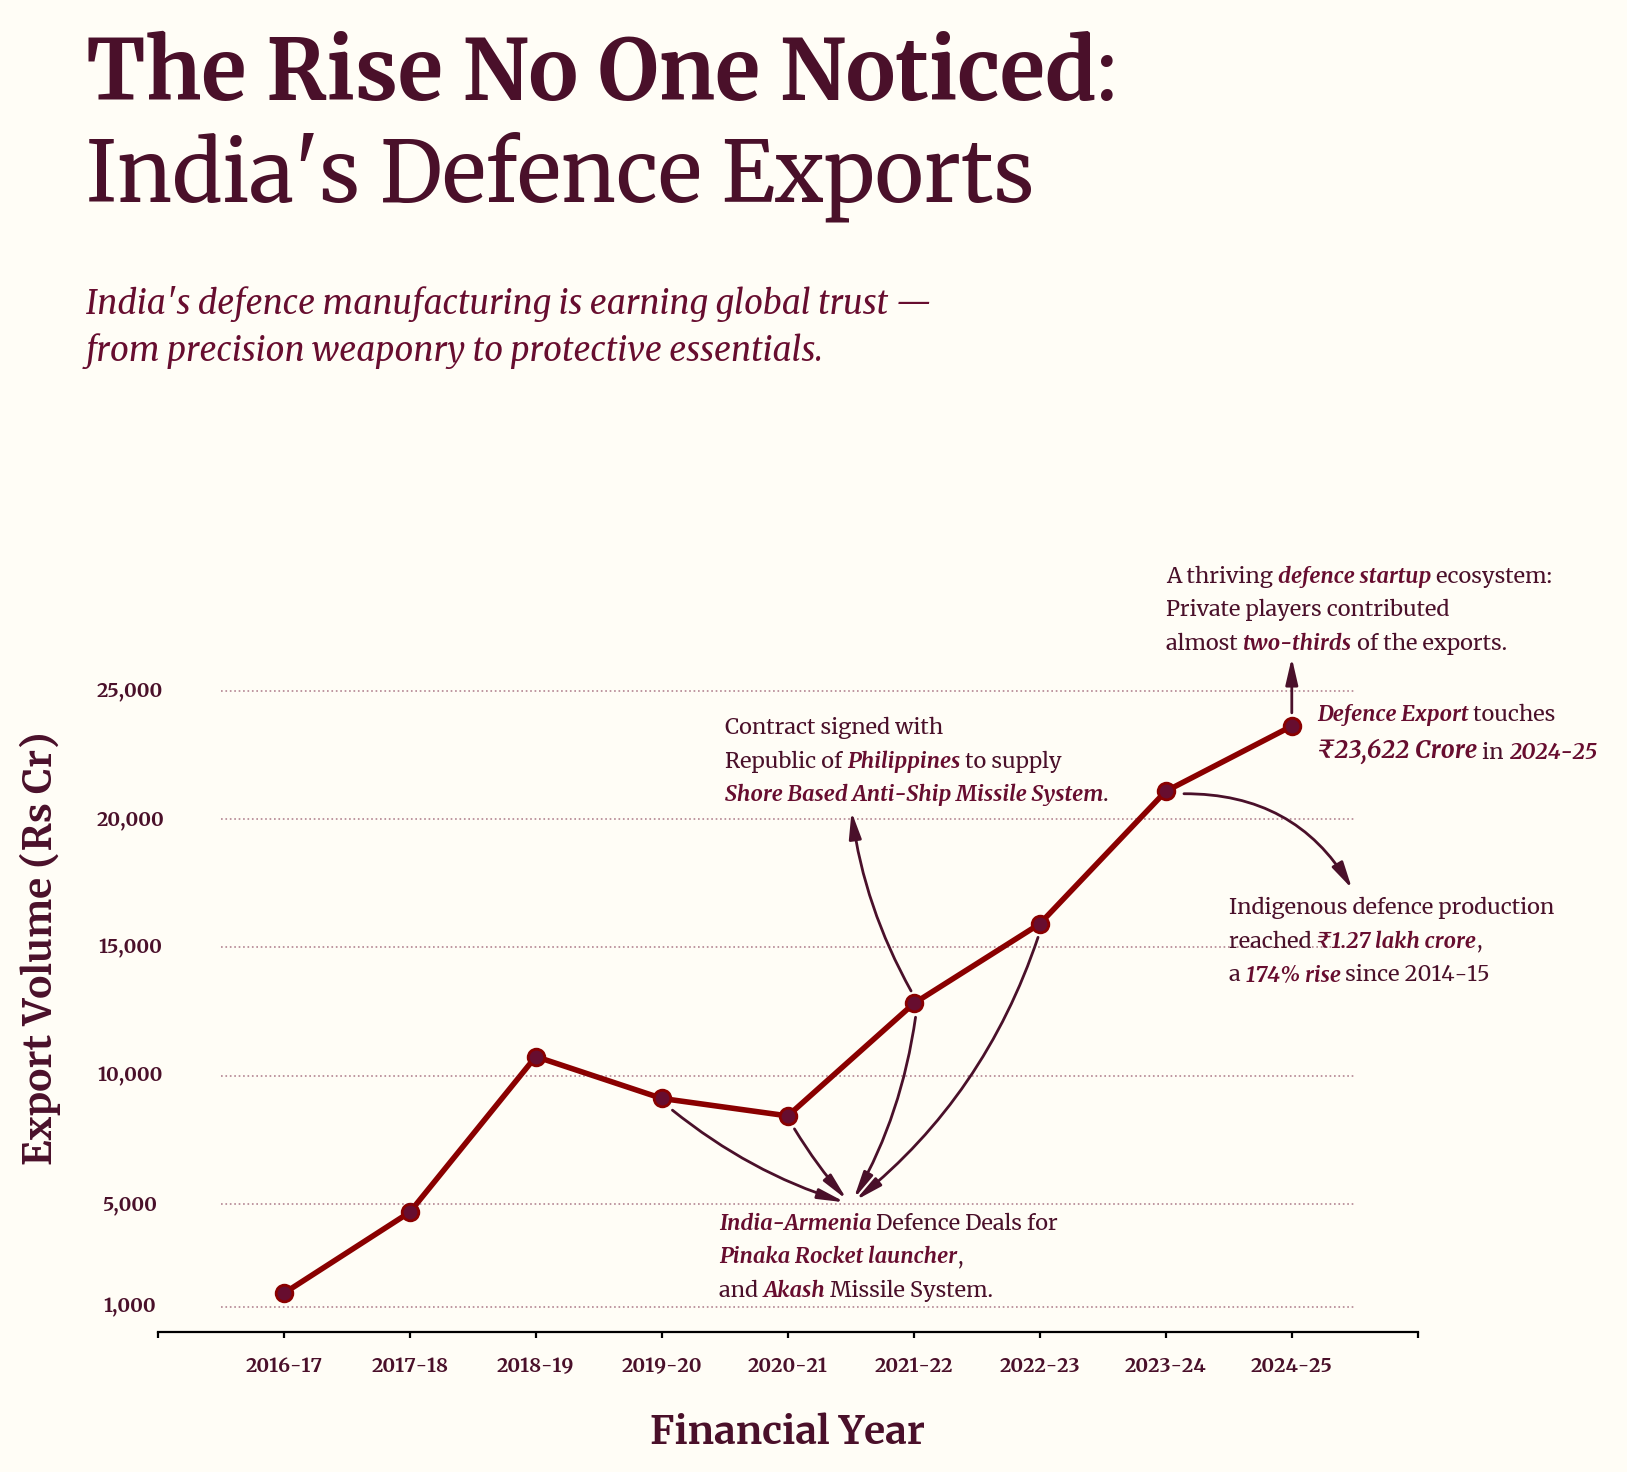

In [38]:
fig, ax = plt.subplots(figsize=(9, 7), dpi=200)

fig.subplots_adjust(left=0.15, right=0.85, top=0.7, bottom=0.15)

fig.set_facecolor(colors["offwhite"])
ax.set_facecolor(colors["offwhite"])

# cleaning up canvas
ax.tick_params(axis="y", which="both", length=0, pad=10)
ax.tick_params(axis="x", which="both", length=2, pad=10)
ax.ticklabel_format(axis='y', style='plain')
ax.spines[["top", "right", "left"]].set_visible(0)

# axis labels
ax.set_xlabel("Financial Year", labelpad=20, **text_style_axis)
ax.set_xticks(
      year_index,
      labels=year_labels, **text_style_axis_labels)

ax.set_ylabel("Export Volume (Rs Cr)", labelpad=20, **text_style_axis)
ax.set_yticks(
      export_index,
      labels=export_index_labels, **text_style_axis_labels)

ax.set_ylim(top=30000)
ax.set_xlim(left=1, right=len(year_index))


# Title and Subtitle
fig_text(s=title, x=0.11, y=1.08, ha="left",
         size=30, font=merriweather, color=colors["maroon"],
         highlight_textprops=[
             dict(font=merriweather_b)
             
         ])

fig_text(s=subtitle, x=0.11, y=.898, ha="left",
         size=12, font=merriweather_i, color=colors["maroon_light"],
         highlight_textprops=[
             
         ])


# Plotting the data
ax.plot(
    year_index[1:-1], exports,
    color=colors["red_deep"], linewidth=2, marker="o", markersize=6, markerfacecolor=colors["maroon_light"],
)

# Highlights

# 2021-22
s = 7.8
ax_text(
    s=pt_2021_22,
    x=5.5, y=24000,
    font=merriweather, color=colors["maroon"], size=s,
    ha="left",
    highlight_textprops=[
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"])
    ], ax=ax
)
ax_arrow(
    head_position=[6.5, 20500],
    tail_position=[7, 12814.52+300],
    ax=ax, radius=-0.1, color=colors["maroon"],
    fill_head=True, head_width=1.85, zorder=10
)

# 2023-24
ax_text(
    s=pt_2023_24,
    x=9.5, y=17000,
    font=merriweather, color=colors["maroon"], size=s,
    ha="left",
    highlight_textprops=[
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"])
    ], ax=ax
)
ax_arrow(
    head_position=[10.5, 17000+100],
    tail_position=[9.1, 21083.38-100],
    ax=ax, radius=-0.3, color=colors["maroon"],
    fill_head=True, head_width=1.85, zorder=10
)
# 2024-25
ax_text(
    s=pt_2024_25,
    x=9, y=29900,
    font=merriweather, color=colors["maroon"], size=s,
    ha="left",
    highlight_textprops=[
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"])
    ], ax=ax
)
ax_arrow(
    head_position=[10, 26500],
    tail_position=[10, 23622+300],
    ax=ax, radius=0, color=colors["maroon"],
    fill_head=True, head_width=1.85, zorder=10
)


# Line Plot Annotation
ax_text(
    s="<Defence Export> touches\n<₹23,622 Crore> in <2024-25>",
    x=10.2, y=23622.0+900,
    font=merriweather, color=colors["maroon"], size=s,
    ha="left",
    highlight_textprops=[
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s+1, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"])
    ], ax=ax
)

# 2019-20 to 2022-23
ax_arrow(
    head_position=[6.5, 5000],
    tail_position=[5.05, 9115-320],
    ax=ax, radius=0.1, color=colors["maroon"],
    fill_head=True, head_width=1.5, zorder=10
)
ax_arrow(
    head_position=[6.5, 5000],
    tail_position=[6.03, 8434-320],
    ax=ax, radius=0.05, color=colors["maroon"],
    fill_head=True, head_width=1.5, zorder=10
)
ax_arrow(
    head_position=[6.5, 5000],
    tail_position=[7.02, 12814-320],
    ax=ax, radius=-0.1, color=colors["maroon"],
    fill_head=True, head_width=1.5, zorder=10
)
ax_arrow(
    head_position=[6.5, 5000],
    tail_position=[8, 15918-320],
    ax=ax, radius=-0.15, color=colors["maroon"],
    fill_head=True, head_width=1.5, zorder=10
)
ax_text(
    s="<India-Armenia> Defence Deals for\n<Pinaka Rocket launcher>,\nand <Akash> Missile System.",
    x=6.8, y=4700,
    font=merriweather, color=colors["maroon"], size=s,
    ha="center",
    highlight_textprops=[
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"]),
        dict(font=merriweather_bi, size=s, color=colors["maroon_light"])
    ], ax=ax
)

# Gridlines
for y in export_index:
    ax.axhline(
        y=y, 
        xmin=0.05, xmax=0.95,
        linestyle=':', 
        linewidth=0.6, 
        color=colors["maroon_light"], 
        alpha=0.5
    )

# plt.show()
plt.savefig(r"..\data_viz\defence_exports_3.jpeg", dpi=250, bbox_inches="tight", pad_inches=1)

---